In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

## Load in the fields

In [2]:
# the simulation's native fields 
native_path = "../../../../../cscratch1/sd/jupiter/sim2_z3_FGPA_cgs.h5"

# dimension of each derived field
n = 50 

# the fields computed by lya_fields.py
tf_path = "tf_fields" + str(n) + ".h5"

h5_nat = h5py.File(native_path,'r')
h5_tf = h5py.File(tf_path,'r')

In [3]:
h5_tf.keys()

<KeysViewHDF5 ['nhi', 'tau_real', 'tau_red']>

In [4]:
# take a cross-section parallel to the yz-plane
ind = 12

treal = h5_tf['tau_real'][ind,...]
tred = h5_tf['tau_red'][ind,...]
n_hi = h5_tf['nhi'][ind,...]

rhob = h5_nat['native_fields']['baryon_density'][ind,:n,:n]
temp = h5_nat['native_fields']['temperature'][ind,:n,:n]
vel = h5_nat['native_fields']['velocity_z'][ind,:n,:n]

In [5]:
# try plotting one slice
# plt.imshow(n_hi, cmap='coolwarm')
# plt.colorbar()

# plt.show()

## Plot cross-sections

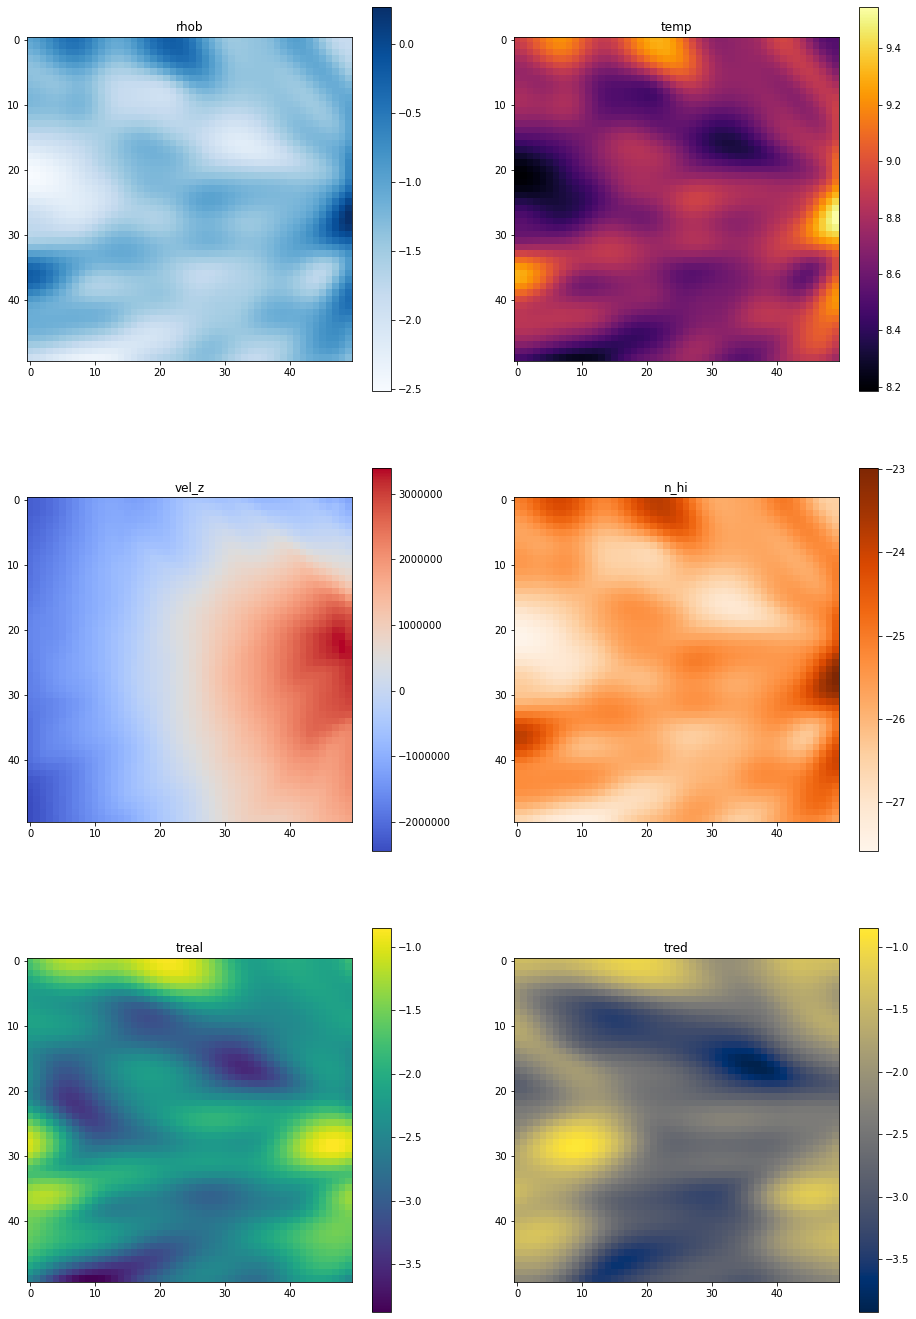

In [6]:
# plot the six slices
fig, axes = plt.subplots(3, 2, figsize=(16,24))

im1 = axes[0,0].imshow(np.log(rhob), cmap='Blues')
axes[0,0].set_title("rhob")
fig.colorbar(im1, ax=axes[0,0])

im2 = axes[0,1].imshow(np.log(temp), cmap='inferno')
axes[0,1].set_title("temp")
fig.colorbar(im2, ax=axes[0,1])

im3 = axes[1,0].imshow(vel, cmap='coolwarm')
axes[1,0].set_title("vel_z")
fig.colorbar(im3, ax=axes[1,0])

im4 = axes[1,1].imshow(np.log(n_hi), cmap='Oranges')
axes[1,1].set_title("n_hi")
fig.colorbar(im4, ax=axes[1,1])

im5 = axes[2,0].imshow(np.log(treal), cmap='viridis')
axes[2,0].set_title("treal")
fig.colorbar(im5, ax=axes[2,0])

im6 = axes[2,1].imshow(np.log(tred), cmap='cividis')
axes[2,1].set_title("tred")
fig.colorbar(im6, ax=axes[2,1])

plt.show()

In [7]:
# check that treal and tred don't have uniform rows
# print(treal)
# print(tred)

## Close HDF5 files

In [8]:
h5_nat.close()
h5_tf.close()